# Working with Classification Trees in Python

# 1. Importing the Data

In [1]:
import pandas as pd

In [2]:
loan =pd.read_csv("C:\\Users\\golda\\Downloads\\Ex_Files_Machine_Learning_with_Python_Decision_Trees\\Ex_Files_Machine_Learning_with_Python_Decision_Trees\\Exercise Files\\02\\loan.csv")

In [3]:
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


# 2. Explore the Data

In [4]:
loan

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No
5,18,15,No
6,28,20,No
7,12,21,Yes
8,24,22,Yes
9,9,30,Yes


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [6]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

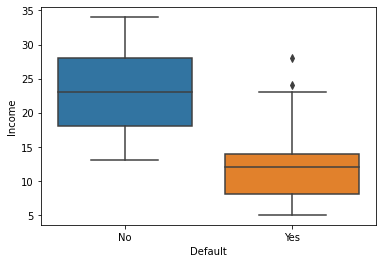

In [8]:
ax =sns.boxplot(data=loan, x='Default', y='Income')

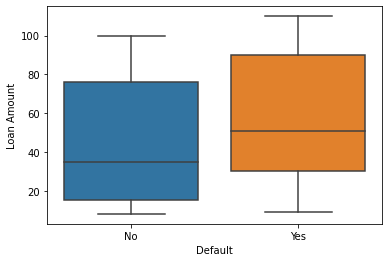

In [9]:
ax=sns.boxplot(data=loan, x='Default', y='Loan Amount')

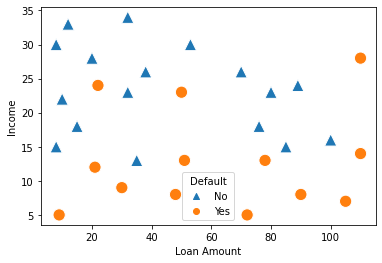

In [15]:
ax = sns.scatterplot(data=loan,
                    x='Loan Amount',
                    y='Income',
                    hue='Default',
                    style='Default',
                    markers=['^', 'o'],
                    s=150)

No handles with labels found to put in legend.


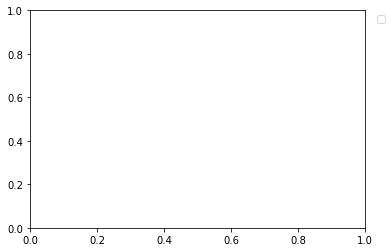

In [14]:
ax=plt.legend(bbox_to_anchor=(1.02,1), loc= 'upper left')

# 3. Prepare the Data

In [16]:
y = loan[['Default']]

In [17]:
X=loan[['Income', 'Loan Amount']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.8, stratify=y, random_state=1234)

In [20]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

# 4. Train and Evaluate the Classification Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(random_state =1234)

In [22]:
model=classifier.fit(X_train, y_train)

In [23]:
model.score(X_test, y_test)

0.5

# 5. Visualise the Classification Tree

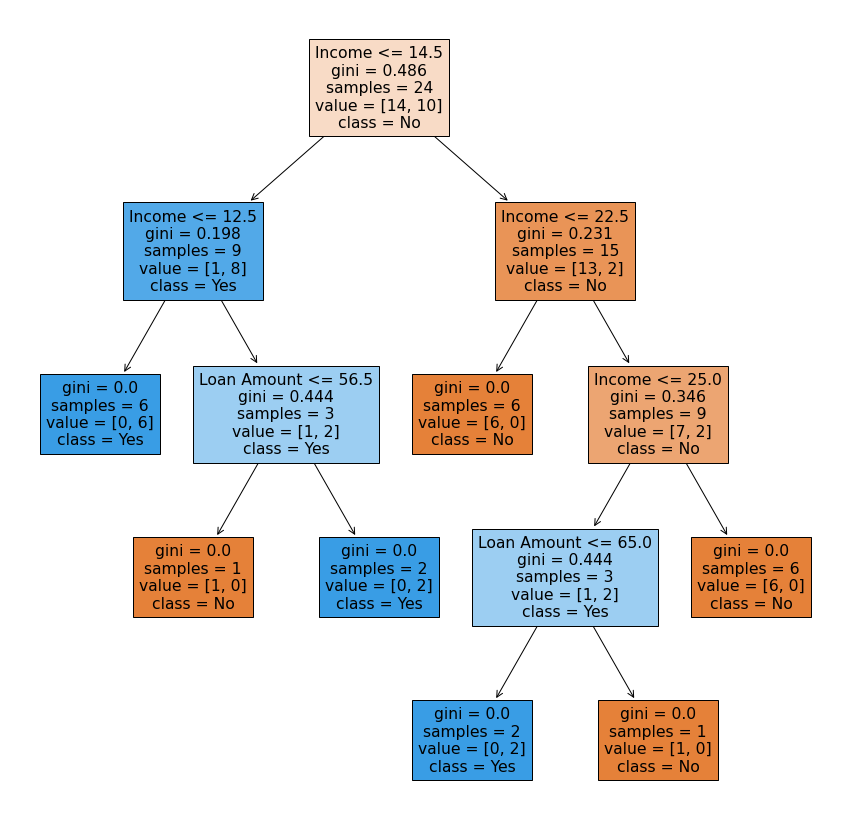

In [26]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,
              feature_names = list(X.columns),
              class_names =['No','Yes'],
              filled=True);

Text(0, 0.5, 'Importance')

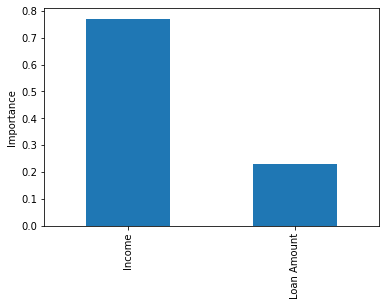

In [28]:
importance = model.feature_importances_
feature_importance =pd.Series(importance, index=X.columns)
feature_importance.plot(kind='bar')
plt.ylabel('Importance')

# 6. Prune the classification Tree

In [29]:
model.score(X_train, y_train)

1.0

In [31]:
model.score(X_test, y_test)

0.5

In [37]:
grid ={'max_depth':[2,3,4,5], 'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3,4,5,6]}

In [38]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state=1234)
gcv =GridSearchCV(estimator= classifier, param_grid=grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [39]:
model_ =gcv.best_estimator_
model_.fit(X_train, y_train)
DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

In [40]:
model_.score(X_train, y_train)


0.875

In [41]:
model_.score(X_test, y_test)

0.8333333333333334

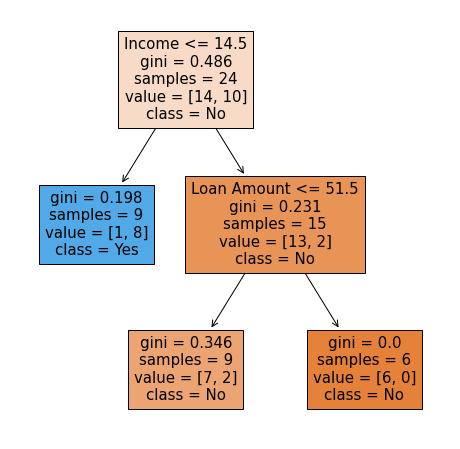

In [42]:
plt.figure(figsize=(8,8))
tree.plot_tree(model_,
              feature_names= list(X.columns),class_names=['No', 'Yes'],
              filled=True);